In [13]:
def pad_2d_list(original_list, pad_to, padding_token):
    # Get the dimensions of the original list
    rows = len(original_list)
    cols = len(original_list[0]) if rows > 0 else 0

    # Create a new 50x50 list filled with -1
    padded_list = [[padding_token for _ in range(pad_to)] for _ in range(pad_to)]

    # Copy the original list into the padded list
    for i in range(min(rows, pad_to)):
        for j in range(min(cols, pad_to)):
            padded_list[i][j] = original_list[i][j]

    return padded_list

# Example usage
original = [
    [1, 2, 3],
    [4, 5, 6],
    [7, 8, 9]
]

result = pad_2d_list(original, 50, -1)

# Print the result (optional)
for row in result:
    print(row)



import torch

padded_tensor = torch.tensor(
    [[[1, 2, 3, -1],
    [4, 5, 6, -1],
    [7, 8, 9, -1],
    [-1, -1, -1, -1]],

    [[1, 2, -1, -1],
    [4, 5, -1, -1],
    [7, 8, -1, -1],
    [-1, -1, -1, -1]]], dtype=torch.float32
)

def depad_2d(padded_tensor, padding_token=-1):
    depadded_list = []
    for sample in padded_tensor:
        sample_list = []
        for row in sample:
            # Convert to list and remove padding
            row_list = [val.item() for val in row if val != padding_token]
            if row_list:  # Only add non-empty rows
                sample_list.append(row_list)
        if sample_list:  # Only add non-empty samples
            depadded_list.append(sample_list)
    return depadded_list

depad_2d(padded_tensor)

[1, 2, 3, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1]
[4, 5, 6, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1]
[7, 8, 9, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1]
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1]
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1]
[-1,

[[[1.0, 2.0, 3.0], [4.0, 5.0, 6.0], [7.0, 8.0, 9.0]],
 [[1.0, 2.0], [4.0, 5.0], [7.0, 8.0]]]

In [14]:
def pad_list_of_lists(original_list, target_length=100, padding_token=[-1, -1, -1, -1]):
    # Create a new list with the target length
    padded_list = original_list.copy()
    
    # Pad the list to the target length
    while len(padded_list) < target_length:
        padded_list.append(padding_token)
    
    return padded_list

# Example usage
original_data = [
    [1, 2, 3, 4],
    [5, 6, 7, 8],
    [9, 10, 11, 12],
    [13, 14, 15, 16]
]

padded_data = pad_list_of_lists(original_data)
print(padded_data)
print(len(padded_data))

padded_tensor = torch.tensor(
    [[[1, 2, 3, 4],
    [5, 6, 7, 8],
    [9, 10, 11, 12],
    [13, 14, 15, 16],
    [-1, -1, -1, -1]],

    [[1, 2, 3, 4],
    [5, 6, 7, 8],
    [-1, -1, -1, -1],
    [-1, -1, -1, -1],
    [-1, -1, -1, -1]]], dtype=torch.float32
)

def depad(padded_tensor, padding_token=[-1, -1, -1, -1]):
    padding_token = torch.tensor(padding_token, dtype=padded_tensor.dtype)
    
    depadded_list = []
    for sample in padded_tensor:
        sample_list = []
        for row in sample:
            if not torch.equal(row, padding_token):
                sample_list.append(row.tolist())
        depadded_list.append(sample_list)
    
    return depadded_list

print(depad(padded_tensor))

[[1, 2, 3, 4], [5, 6, 7, 8], [9, 10, 11, 12], [13, 14, 15, 16], [-1, -1, -1, -1], [-1, -1, -1, -1], [-1, -1, -1, -1], [-1, -1, -1, -1], [-1, -1, -1, -1], [-1, -1, -1, -1], [-1, -1, -1, -1], [-1, -1, -1, -1], [-1, -1, -1, -1], [-1, -1, -1, -1], [-1, -1, -1, -1], [-1, -1, -1, -1], [-1, -1, -1, -1], [-1, -1, -1, -1], [-1, -1, -1, -1], [-1, -1, -1, -1], [-1, -1, -1, -1], [-1, -1, -1, -1], [-1, -1, -1, -1], [-1, -1, -1, -1], [-1, -1, -1, -1], [-1, -1, -1, -1], [-1, -1, -1, -1], [-1, -1, -1, -1], [-1, -1, -1, -1], [-1, -1, -1, -1], [-1, -1, -1, -1], [-1, -1, -1, -1], [-1, -1, -1, -1], [-1, -1, -1, -1], [-1, -1, -1, -1], [-1, -1, -1, -1], [-1, -1, -1, -1], [-1, -1, -1, -1], [-1, -1, -1, -1], [-1, -1, -1, -1], [-1, -1, -1, -1], [-1, -1, -1, -1], [-1, -1, -1, -1], [-1, -1, -1, -1], [-1, -1, -1, -1], [-1, -1, -1, -1], [-1, -1, -1, -1], [-1, -1, -1, -1], [-1, -1, -1, -1], [-1, -1, -1, -1], [-1, -1, -1, -1], [-1, -1, -1, -1], [-1, -1, -1, -1], [-1, -1, -1, -1], [-1, -1, -1, -1], [-1, -1, -1, -1], 

In [3]:
import json

def extract_bboxes(data):
    bboxes = []
    for annotation in data['annotations']:
        bbox = annotation['bbox']
        bboxes.append(bbox)
    return bboxes

# Example usage
sample_data = {
    "filename": "PMC5451934_004_00.png",
    "image_id": 548842,
    "html": ["<thead>", "<tr>", "<td>", "</td>", "<td>", "</td>", "<td>", "</td>", "<td>", "</td>", "</tr>", "</thead>", "<tbody>", "<tr>", "<td>", "</td>", "<td>", "</td>", "<td>", "</td>", "<td>", "</td>", "</tr>", "<tr>", "<td>", "</td>", "<td>", "</td>", "<td>", "</td>", "<td>", "</td>", "</tr>", "<tr>", "<td>", "</td>", "<td>", "</td>", "<td>", "</td>", "<td>", "</td>", "</tr>", "</tbody>"],
    "annotations": [
        {
            "bbox": [46, 5, 43, 11],
            "category_id": 0,
            "area": 473
        },
        {
            "bbox": [146, 5, 64, 11],
            "category_id": 0,
            "area": 704
        },
        # Additional annotations...
    ]
}

bboxes = extract_bboxes(sample_data)
print(bboxes)

[[46, 5, 43, 11], [146, 5, 64, 11]]


In [3]:
import torch

# Function to convert (x0, y0, x1, y1) to (x0, y0, width, height)
def convert_to_width_height(boxes):
    # Convert from (top_left_x, top_left_y, bottom_right_x, bottom_right_y) 
    # to (top_left_x, top_left_y, width, height)
    x0, y0, x1, y1 = boxes.unbind(-1)
    width = x1 - x0
    height = y1 - y0
    return torch.stack((x0, y0, width, height), dim=-1)

# Sample results list with two entries (batch_size = 2)
results = [
    {'boxes': torch.tensor([[10, 20, 50, 30], [30, 40, 70, 80], [100, 120, 140, 150]])},  # For batch 1
    {'boxes': torch.tensor([[15, 25, 55, 65], [35, 45, 75, 85], [105, 125, 145, 165]])}   # For batch 2
]

# Convert and stack "boxes" values
boxes_list = [convert_to_width_height(d['boxes']) for d in results]
boxes_tensor = torch.stack(boxes_list)

# Output the result
print("Converted and Stacked Bounding Boxes Tensor:")
print(boxes_tensor)
print("Shape of the resulting tensor:", boxes_tensor.shape)


Converted and Stacked Bounding Boxes Tensor:
tensor([[[ 10,  20,  40,  10],
         [ 30,  40,  40,  40],
         [100, 120,  40,  30]],

        [[ 15,  25,  40,  40],
         [ 35,  45,  40,  40],
         [105, 125,  40,  40]]])
Shape of the resulting tensor: torch.Size([2, 3, 4])


i have a log-softmaxxed probability tensor of shape (batch_size, num_edges, num_classes) and a edge tensor of shape (batch_size, num_edges, 8). the 8 is because two bboxes (nodes) are of the format (left_corner_x, left_corner_y, width, height) and are concatenated together. i need a script to take these two inputs, the original image numpy (result of cv2.imread) and draw all bboxes on the image. i want to draw all edges too, with the color of a particular edge corresponding to the predicted class. there are 4 classes, with class 0 being transparent, class 1 being red, class 2 being blue and class 3 being green. help me to write that script and a small example to test it out. i will procure the image myself.

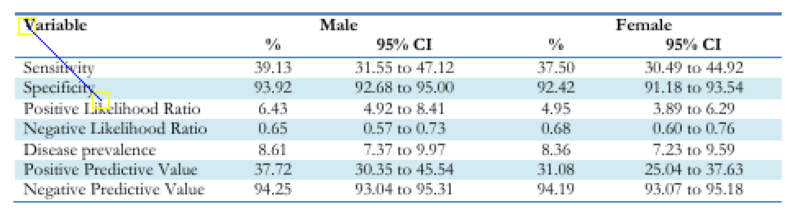

In [7]:
import cv2
import numpy as np
import torch
import matplotlib.pyplot as plt

def draw_bboxes_and_edges(image, prob_tensor, edge_tensor, bbox_thickness=2, line_thickness=2):
    # Define the color mapping for the classes
    colors = {
        1: (0, 0, 255),   # Red
        2: (255, 0, 0),   # Blue
        3: (0, 255, 0)    # Green
    }

    batch_size, num_edges, num_classes = prob_tensor.shape

    # Ensure prob_tensor is in log-softmax format and get the predicted class per edge
    predicted_classes = torch.argmax(prob_tensor, dim=-1)

    for i in range(batch_size):
        for j in range(num_edges):
            # Extract the bounding boxes for the current edge
            bbox1 = edge_tensor[i, j, :4].cpu().numpy().astype(int)
            bbox2 = edge_tensor[i, j, 4:].cpu().numpy().astype(int)

            # Draw the bounding boxes on the image
            x1, y1, w1, h1 = bbox1
            x2, y2, w2, h2 = bbox2

            cv2.rectangle(image, (x1, y1), (x1 + w1, y1 + h1), (0, 255, 255), bbox_thickness)
            cv2.rectangle(image, (x2, y2), (x2 + w2, y2 + h2), (0, 255, 255), bbox_thickness)

            # Get the predicted class and corresponding color
            predicted_class = predicted_classes[i, j].item()
            if predicted_class == 0:
                continue  # Skip drawing for class 0

            color = colors[predicted_class]

            # Draw the edge as a line connecting the centers of the two bounding boxes
            center1 = (x1 + w1 // 2, y1 + h1 // 2)
            center2 = (x2 + w2 // 2, y2 + h2 // 2)
            cv2.line(image, center1, center2, color, line_thickness)

    return image

# Load an image using OpenCV (replace with your image path)
image = cv2.imread('PMC5402779_004_00.png')

# Example tensors
prob_tensor = torch.tensor([[[1.0, -2.0, -1.5, -3.0], [-2.0, 1.0, 1.5, -3.0]]])  # Shape: (1, 2, 4)
prob_tensor = torch.nn.functional.log_softmax(prob_tensor, dim=-1)
edge_tensor = torch.tensor([[[5, 5, 10, 10, 50, 50, 10, 10], 
                                [50, 50, 10,10, 5, 5, 10, 10]]])  # Shape: (1, 2, 8)

# Draw the bboxes and edges
output_image = draw_bboxes_and_edges(image, prob_tensor, edge_tensor, bbox_thickness=1, line_thickness=1)

# Convert BGR (OpenCV format) to RGB for displaying with matplotlib
output_image_rgb = cv2.cvtColor(output_image, cv2.COLOR_BGR2RGB)

# Display the image in the notebook
plt.figure(figsize=(10, 10))
plt.imshow(output_image_rgb)
plt.axis('off')  # Hide axes
plt.show()

pred_bboxes is tensor of shape shape(batch_size, num_nodes, 4) and the format is (top_left_x, top_left_y, width, height). i need to construct an edge index 

In [2]:
import torch
import torch.nn.functional as F

# Set random seed for reproducibility
torch.manual_seed(42)

# Generate random model outputs (logits) and target labels
batch_size = 5
num_classes = 3

# Simulate a batch of logits (e.g., output from a model)
logits = torch.randn(batch_size, num_classes)

# Convert logits to log-probabilities
log_probs = F.log_softmax(logits, dim=1)

# Simulate target labels for each sample in the batch
targets = torch.randint(0, num_classes, (batch_size,))

# Method 1: Calculate loss for the entire batch at once
batch_loss = F.nll_loss(log_probs, targets)

# Method 2: Calculate loss for each sample individually and then combine
individual_losses = []
for i in range(batch_size):
    log_prob = log_probs[i].unsqueeze(0)  # Shape: [1, num_classes]
    target = targets[i].unsqueeze(0)      # Shape: [1]
    loss = F.nll_loss(log_prob, target, reduction='none')
    individual_losses.append(loss)

# Combine the individual losses by averaging
combined_loss = torch.mean(torch.stack(individual_losses))

# Print the results
print("Batch Loss (calculated at once):", batch_loss.item())
print("Combined Loss (calculated individually):", combined_loss.item())

# Verify that the two methods produce the same result
assert torch.isclose(batch_loss, combined_loss), "The losses do not match!"
print("The losses match! Both methods produce the same result.")


Batch Loss (calculated at once): 1.7118861675262451
Combined Loss (calculated individually): 1.7118860483169556
The losses match! Both methods produce the same result.


In [2]:
test_pred_bboxes = torch.tensor([[8.220409393310547, 240.16688537597656, 9.705221176147461, 10.60528564453125], [221.33749389648438, 85.42630004882812, 20.155166625976562, 10.747772216796875], [4.969128131866455, 296.5960388183594, 77.31825256347656, 10.41400146484375], [221.778564453125, 71.88664245605469, 17.50457763671875, 10.154212951660156], [221.42018127441406, 239.1053466796875, 17.916275024414062, 10.888458251953125], [221.06082153320312, 169.17779541015625, 17.666885375976562, 10.703521728515625], [7.496551990509033, 170.78701782226562, 50.71630096435547, 11.1954345703125], [0.7856517434120178, 14.462630271911621, 44.08927536010742, 11.08155345916748], [338.7057800292969, 326.4298400878906, 39.93780517578125, 10.89630126953125], [458.464599609375, 296.4773254394531, 18.7093505859375, 10.235443115234375], [221.11038208007812, 365.8001708984375, 18.978836059570312, 10.3946533203125], [7.622995853424072, 29.43917465209961, 13.741762161254883, 10.92449951171875], [339.10113525390625, 43.68025588989258, 38.57879638671875, 10.323173522949219], [338.7159423828125, 184.06358337402344, 38.63714599609375, 10.205917358398438], [339.4071350097656, 339.64947509765625, 38.27801513671875, 10.079254150390625], [338.88763427734375, 282.775634765625, 39.8890380859375, 10.393646240234375], [457.1811218261719, 16.182945251464844, 24.904205322265625, 10.540412902832031], [338.25982666015625, 128.14788818359375, 41.443084716796875, 10.40032958984375], [338.86956787109375, 240.88954162597656, 39.56378173828125, 10.341720581054688], [456.9420471191406, 99.72378540039062, 19.233489990234375, 10.040313720703125], [4.385378837585449, 254.4150848388672, 43.096866607666016, 10.211990356445312], [6.740543365478516, 367.3272399902344, 24.90082359313965, 10.14678955078125], [220.7989501953125, 282.8264465332031, 18.955612182617188, 10.91290283203125], [8.700653076171875, 380.19232177734375, 19.804067611694336, 10.04559326171875], [457.9308776855469, 141.21267700195312, 18.630157470703125, 10.041427612304688], [458.622802734375, 254.96597290039062, 18.197998046875, 9.926605224609375], [458.3870849609375, 197.81756591796875, 18.524261474609375, 9.79046630859375], [4.628708839416504, 128.1451416015625, 93.3445816040039, 10.632278442382812], [221.3592071533203, 310.0870056152344, 17.9090576171875, 10.657562255859375], [7.3480682373046875, 95.62490844726562, 41.36208724975586, 10.924858093261719], [221.52041625976562, 130.6095428466797, 17.829483032226562, 10.42449951171875], [338.81378173828125, 169.87232971191406, 38.45751953125, 10.167404174804688], [6.918522834777832, 335.21307373046875, 12.906994819641113, 11.47479248046875], [338.03955078125, 73.0851821899414, 37.914215087890625, 9.9283447265625], [221.64715576171875, 113.5085678100586, 18.0220947265625, 10.398750305175781], [7.52794885635376, 225.6678009033203, 11.006332397460938, 10.828750610351562], [7.283869743347168, 198.1222381591797, 68.6331558227539, 10.386795043945312], [7.560637950897217, 212.01644897460938, 8.535728454589844, 10.904693603515625], [220.5076904296875, 28.824663162231445, 18.413497924804688, 10.782735824584961], [1.0995908975601196, 284.3966979980469, 142.09524536132812, 11.082275390625], [458.2181396484375, 3.959500551223755, 25.8502197265625, 9.349483489990234], [338.8582458496094, 4.223483562469482, 26.154876708984375, 9.628107070922852], [0.9459109902381897, 4.2228312492370605, 26.02804946899414, 9.37318229675293], [6.67016077041626, 269.31866455078125, 57.56589889526367, 10.04083251953125], [4.703246593475342, 114.79791259765625, 81.19087982177734, 10.087448120117188], [457.36572265625, 57.129966735839844, 18.736846923828125, 10.098190307617188], [220.95921325683594, 268.2860107421875, 18.576248168945312, 10.73248291015625], [221.15599060058594, 325.0733642578125, 17.71441650390625, 10.607513427734375], [7.897769451141357, 158.1151580810547, 48.3871955871582, 11.028182983398438], [4.875394344329834, 351.1089782714844, 28.847753524780273, 11.621978759765625], [220.67784118652344, 42.88075637817383, 18.3289794921875, 11.113922119140625], [6.002743721008301, 53.43893051147461, 17.955032348632812, 10.713787078857422], [458.300048828125, 352.80096435546875, 18.04168701171875, 10.134307861328125], [221.02386474609375, 155.4023895263672, 17.97357177734375, 10.958999633789062], [219.73956298828125, 4.260929584503174, 40.076171875, 9.551870346069336], [4.647803783416748, 142.26434326171875, 47.35176086425781, 10.297958374023438], [340.9264831542969, 379.26397705078125, 37.024627685546875, 10.40704345703125], [222.39366149902344, 380.1714172363281, 16.330307006835938, 10.010345458984375], [221.08139038085938, 217.6854248046875, 17.9393310546875, 10.487701416015625], [220.94854736328125, 183.81185913085938, 19.979217529296875, 10.953582763671875], [220.9991455078125, 339.1720886230469, 18.983505249023438, 10.45086669921875], [8.579583168029785, 72.23822784423828, 18.16921615600586, 11.08428955078125], [339.1927490234375, 227.80967712402344, 39.2021484375, 10.060791015625], [339.3795166015625, 85.95793151855469, 38.764190673828125, 10.038246154785156]] , dtype=torch.float32)

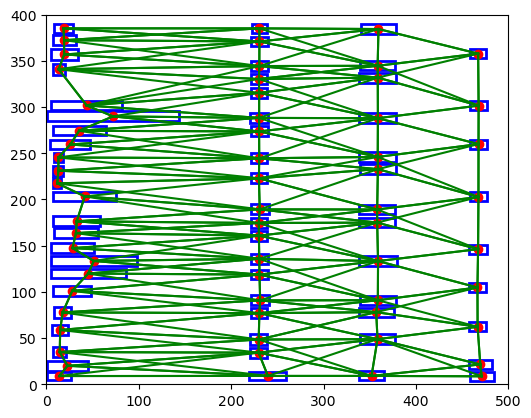

In [3]:
import torch
import numpy as np
import matplotlib.pyplot as plt


def intersect_1d(start1, end1, start2, end2):
    return max(start1, start2) <= min(end1, end2)

def get_psuedo_knn(bboxes, default_radius=30, candidate_radius = 50):
    """
    Construct a pseudo-KNN graph based on the bounding box overlap and centroids.
    
    Args:
        bboxes (torch.Tensor): Tensor of shape (num_bboxes, 4) where each row represents
                               [x_min, y_min, width, height] for a bounding box.
        default_radius (int): Radius used to create pseudo connections when no neighbors are found.

    Returns:
        edge_index (torch.Tensor): Edge index tensor of shape (2, num_edges) representing the connections.
    """
    # Initialize the edge index list to store connections
    edge_index = torch.empty((2, 0), dtype=torch.long)

    # Compute the centroids of all bounding boxes
    centers = bboxes[:, :2] + (bboxes[:, 2:] / 2)  # Shape: (num_bboxes, 2)
    num_bboxes = bboxes.size(0)

    # Iterate over each target bbox to construct its neighborhood
    for i, target_bbox in enumerate(bboxes):
        horz_candidates, vert_candidates = [], []

        for j, knn_bbox in enumerate(bboxes):
            if intersect_1d(target_bbox[0] - candidate_radius, target_bbox[0] + target_bbox[2] + candidate_radius, 
                            knn_bbox[0], knn_bbox[0] + knn_bbox[2]):
                vert_candidates.append(knn_bbox)
            elif intersect_1d(target_bbox[1] - candidate_radius, target_bbox[1] + target_bbox[3] + candidate_radius, 
                              knn_bbox[1], knn_bbox[1] + knn_bbox[3]):
                horz_candidates.append(knn_bbox)
        
        # Initialize nearest neighbors
        up, down, left, right = None, None, None, None
        
        # Horizontal candidates (left and right)
        for horz_candidate in horz_candidates:
            # left candidate
            if horz_candidate[0] + horz_candidate[2] < target_bbox[0]:
                if left is None or horz_candidate[0] + horz_candidate[2] > left[0] + left[2]:
                    left = horz_candidate
            # right candidate
            if horz_candidate[0] > target_bbox[0] + target_bbox[2]:
                if right is None or horz_candidate[0] < right[0]:
                    right = horz_candidate
        
        # Vertical candidates (up and down)
        for vert_candidate in vert_candidates:
            # up candidate
            if vert_candidate[1] + vert_candidate[3] < target_bbox[1]:
                if up is None or vert_candidate[1] + vert_candidate[3] > up[1] + up[3]:
                    up = vert_candidate
            # down candidate
            if vert_candidate[1] > target_bbox[1] + target_bbox[3]:
                if down is None or vert_candidate[1] < down[1]:
                    down = vert_candidate
        
        # Fallback to default radius if no neighbors found
        if left is None: left = [target_bbox[0] - default_radius, 0, 0, 0]
        if right is None: right = [target_bbox[0] + default_radius, 0, target_bbox[2], 0]
        if up is None: up = [0, target_bbox[1] - default_radius, 0, 0]
        if down is None: down = [0, target_bbox[1] + default_radius, 0, target_bbox[3]]

        # Construct the local area of interest (bounding box)
        xmin, xmax = left[0], right[0] + right[2]
        ymin, ymax = up[1], down[1] + down[3]

        # Now, find all bboxes whose centroids lie within the area of interest
        for j, centroid in enumerate(centers):
            if xmin <= centroid[0] <= xmax and ymin <= centroid[1] <= ymax:
                # Create an edge between the target bbox and the neighboring bbox
                edge_index = torch.cat([edge_index, torch.tensor([[i], [j]])], dim=1)

    return edge_index

# Sample bboxes (bounding boxes): [top_left_x, top_left_y, width, height]
bboxes = torch.tensor([
    [1, 1, 2, 2],
    [4, 4, 2, 2],
    [8, 1, 2, 2],
    [6, 5, 2, 2],
    [2, 7, 2, 2],
    [7, 7, 2, 2]
], dtype=torch.float32)

# Number of nearest neighbors
k = 10

# Create a function to visualize bboxes and edges
def plot_bboxes_and_edges(bboxes, edge_index):
    fig, ax = plt.subplots()
    
    # Plot the bounding boxes
    for bbox in bboxes:
        x, y, w, h = bbox
        rect = plt.Rectangle((x, y), w, h, linewidth=2, edgecolor='b', facecolor='none')
        ax.add_patch(rect)
        # Plot center points
        center_x, center_y = x + w / 2, y + h / 2
        plt.plot(center_x, center_y, 'ro')

    # Draw edges between the centers of the bounding boxes
    centers = bboxes[:, :2] + (bboxes[:, 2:] / 2)  # Center of each bbox
    for i in range(edge_index.size(1)):
        start_node = edge_index[0, i]
        end_node = edge_index[1, i]
        start_center = centers[start_node]
        end_center = centers[end_node]
        plt.plot([start_center[0], end_center[0]], [start_center[1], end_center[1]], 'g-')

    plt.xlim(0, 500)
    plt.ylim(0, 400)
    plt.gca().set_aspect('equal', adjustable='box')
    plt.show()

# Use the given function to generate knn edge_index
edge_index = get_psuedo_knn(test_pred_bboxes)

# Plot the bboxes and the corresponding edges
plot_bboxes_and_edges(test_pred_bboxes, edge_index)


Distances:
tensor([[0.0000, 2.8284, 5.0000, 7.2111],
        [2.8284, 0.0000, 3.6056, 4.4721],
        [5.0000, 3.6056, 0.0000, 4.1231],
        [7.2111, 4.4721, 4.1231, 0.0000]])
Bearings (in radians):
 tensor([[ 0.0000, -2.3562,  3.1416, -2.5536],
        [ 0.7854,  0.0000,  2.5536, -2.6779],
        [ 0.0000, -0.5880,  0.0000, -1.8158],
        [ 0.5880,  0.4636,  1.3258,  0.0000]])
Bearings (in degrees):
 tensor([[   0.0000, -135.0000,  180.0000, -146.3099],
        [  45.0000,    0.0000,  146.3099, -153.4350],
        [   0.0000,  -33.6901,    0.0000, -104.0362],
        [  33.6901,   26.5651,   75.9638,    0.0000]])
Mask for Node 1:
 tensor([  0.,   0.,   0., 999.])


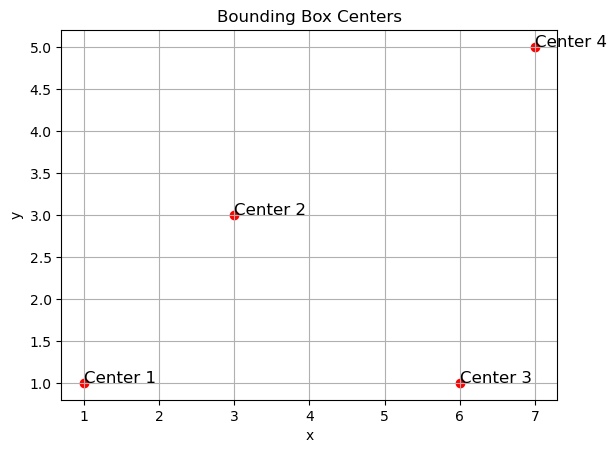

In [66]:
import torch
import matplotlib.pyplot as plt

# Example bounding boxes (top_left_x, top_left_y, width, height)
bboxes = torch.tensor([
    [0.0, 0.0, 2.0, 2.0],  # bbox 1
    [2.0, 2.0, 2.0, 2.0],  # bbox 2
    [5.0, 0.0, 2.0, 2.0],  # bbox 3
    [6.0, 4.0, 2.0, 2.0]   # bbox 4
])

# Get bbox centers
centers = bboxes[:, :2] + (bboxes[:, 2:] / 2)  # Shape: (num_bboxes, 2)

num_bboxes = centers.size(0)

# Compute the pairwise Euclidean distances between bbox centers
distances = torch.cdist(centers, centers, p=2)  # Shape: (num_bboxes, num_bboxes)
print(f"Distances:\n{distances}")

# Compute the difference in y and x coordinates between all pairs
delta_y = centers[:, None, 1] - centers[None, :, 1]
delta_x = centers[:, None, 0] - centers[None, :, 0]

# Compute bearings (angles) in radians
bearings = torch.atan2(delta_y, delta_x)
print("Bearings (in radians):\n", bearings)

# Convert bearings from radians to degrees for easier interpretation
bearings_deg = torch.rad2deg(bearings)
print("Bearings (in degrees):\n", bearings_deg)

# Function to create the mask
def create_angle_mask(centers, bearings, distances, node_idx, angle_threshold):
    num_bboxes = centers.size(0)
    
    # Initialize the mask with zeros
    mask = torch.zeros(num_bboxes, dtype=torch.float)
    
    # Calculate the angular differences between bearings for node_idx
    for i in range(num_bboxes):
        for j in range(i + 1, num_bboxes):
            # Calculate the absolute angular difference
            angle_diff = torch.abs(bearings[node_idx, i] - bearings[node_idx, j])
            
            # Ensure the difference is in the range [0, 180] degrees
            angle_diff = min(angle_diff, 360 - angle_diff)
            
            # If the angle difference is below the threshold
            if angle_diff < angle_threshold:
                # Compare distances and assign 999 to the larger distance in the mask
                if distances[node_idx, i] > distances[node_idx, j]:
                    mask[i] = 999
                else:
                    mask[j] = 999
    
    return mask

# Define the node index (node_idx) and angle threshold
node_idx = 0  # Example: node 1
angle_threshold = 30  # Example: angle threshold of 30 degrees

# Generate the mask for node_idx based on the angle threshold
mask = create_angle_mask(centers, bearings_deg, distances, node_idx, angle_threshold)

# Print the generated mask
print(f"Mask for Node {node_idx + 1}:\n", mask)

# Plot the centers and bearings
plt.scatter(centers[:, 0], centers[:, 1], color='red')
for i, (x, y) in enumerate(centers):
    plt.text(x, y, f'Center {i+1}', fontsize=12)

plt.title('Bounding Box Centers')
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True)
plt.show()


In [10]:
import torch

def prune_and_bidirectional(edge_index):
    # Step 1: Prune self-connections
    mask = edge_index[0] != edge_index[1]  # Remove self-connections
    edge_index = edge_index[:, mask]        # Apply mask to prune self-loops

    # Step 2: Convert unidirectional edges to bidirectional
    # Convert to a set of tuples for fast lookup
    edge_set = set(map(tuple, edge_index.t().tolist()))

    # List to hold new bidirectional edges
    new_edges = []

    # Check for unidirectional edges and add reverse if not present
    for i, j in edge_set:
        if (j, i) not in edge_set:  # If reverse edge does not exist
            new_edges.append([j, i])

    # Add the new bidirectional edges
    if new_edges:
        new_edges_tensor = torch.tensor(new_edges, device=edge_index.device).t()
        edge_index = torch.cat([edge_index, new_edges_tensor], dim=1)

    return edge_index

# Example to test the functionality
edge_index = torch.tensor([
    [0, 0, 0, 1, 2, 3, 4, 4, 5, 6, 7],
    [0, 1, 4, 0, 3, 2, 4, 5, 5, 7, 6]
], device='cuda:0')

# Test the function
new_edge_index = prune_and_bidirectional(edge_index)

# Print results
print("Original edge index:")
print(edge_index)
print("\nNew edge index (after pruning and making bidirectional):")
print(new_edge_index)


Original edge index:
tensor([[0, 0, 0, 1, 2, 3, 4, 4, 5, 6, 7],
        [0, 1, 4, 0, 3, 2, 4, 5, 5, 7, 6]], device='cuda:0')

New edge index (after pruning and making bidirectional):
tensor([[0, 0, 1, 2, 3, 4, 6, 7, 4, 5],
        [1, 4, 0, 3, 2, 5, 7, 6, 0, 4]], device='cuda:0')


In [6]:
import torch
import math

def positionalencoding2d(d_model, height, width):
    """
    :param d_model: dimension of the model
    :param height: height of the positions
    :param width: width of the positions
    :return: d_model*height*width position matrix
    """
    if d_model % 4 != 0:
        raise ValueError("Cannot use sin/cos positional encoding with "
                         "odd dimension (got dim={:d})".format(d_model))
    pe = torch.zeros(d_model, height, width)
    # Each dimension use half of d_model
    d_model = int(d_model / 2)
    div_term = torch.exp(torch.arange(0., d_model, 2) *
                         -(math.log(10000.0) / d_model))
    pos_w = torch.arange(0., width).unsqueeze(1)
    pos_h = torch.arange(0., height).unsqueeze(1)
    pe[0:d_model:2, :, :] = torch.sin(pos_w * div_term).transpose(0, 1).unsqueeze(1).repeat(1, height, 1)
    pe[1:d_model:2, :, :] = torch.cos(pos_w * div_term).transpose(0, 1).unsqueeze(1).repeat(1, height, 1)
    pe[d_model::2, :, :] = torch.sin(pos_h * div_term).transpose(0, 1).unsqueeze(2).repeat(1, 1, width)
    pe[d_model + 1::2, :, :] = torch.cos(pos_h * div_term).transpose(0, 1).unsqueeze(2).repeat(1, 1, width)

    return pe

# Assuming you have the positional encoding tensor (pe) of size (d_model, height, width)
d_model = 64  # Example
height = 32   # Example height of the grid
width = 32    # Example width of the grid
pe = positionalencoding2d(d_model, height, width)  # Positional encodings

# Bounding boxes tensor of shape (num_bboxes, 4) where format is (topleftx, toplefty, width, height)
gt_bboxes = torch.tensor([[5, 10, 6, 4], [15, 20, 8, 6]])  # Example bboxes (num_bboxes, 4)

# Calculate centroids of the bounding boxes
centroids_x = gt_bboxes[:, 0] + gt_bboxes[:, 2] / 2  # topleftx + width / 2
centroids_y = gt_bboxes[:, 1] + gt_bboxes[:, 3] / 2  # toplefty + height / 2

# Convert centroids to integer indices (since the positional encoding grid is discrete)
centroids_x = centroids_x.long()  # Convert to long for indexing
centroids_y = centroids_y.long()

# Extract positional encodings for each centroid
num_bboxes = gt_bboxes.size(0)
centroid_pos_encodings = torch.zeros((num_bboxes, d_model))

for i in range(num_bboxes):
    centroid_pos_encodings[i] = pe[:, centroids_y[i], centroids_x[i]]

# Now centroid_pos_encodings is of shape (num_bboxes, d_model)
print(centroid_pos_encodings.shape)  # Output should be (num_bboxes, d_model)
print(centroid_pos_encodings)


torch.Size([2, 64])
tensor([[ 0.9894, -0.1455, -0.9773, -0.2120,  0.5743, -0.8186,  0.9890,  0.1476,
          0.7174,  0.6967,  0.4349,  0.9005,  0.2503,  0.9682,  0.1418,  0.9899,
          0.0799,  0.9968,  0.0450,  0.9990,  0.0253,  0.9997,  0.0142,  0.9999,
          0.0080,  1.0000,  0.0045,  1.0000,  0.0025,  1.0000,  0.0014,  1.0000,
         -0.5366,  0.8439,  0.4483,  0.8939, -0.6077, -0.7942,  0.8456, -0.5338,
          0.9320,  0.3624,  0.6247,  0.7808,  0.3704,  0.9289,  0.2118,  0.9773,
          0.1197,  0.9928,  0.0674,  0.9977,  0.0379,  0.9993,  0.0213,  0.9998,
          0.0120,  0.9999,  0.0067,  1.0000,  0.0038,  1.0000,  0.0021,  1.0000],
        [ 0.1499,  0.9887, -0.9520, -0.3061, -0.2714,  0.9625, -0.2349, -0.9720,
          0.9463, -0.3233,  0.8765,  0.4815,  0.5653,  0.8249,  0.3315,  0.9435,
          0.1889,  0.9820,  0.1066,  0.9943,  0.0600,  0.9982,  0.0338,  0.9994,
          0.0190,  0.9998,  0.0107,  0.9999,  0.0060,  1.0000,  0.0034,  1.0000,
       